# **Prices of Graphics Cards** 
## *What is the best budget graphic card ?*
### Alexis Ryan Student ID:100914275

Over the years, I've built three gaming PCs from scratch, each an exciting journey in choosing components and assembling the perfect machine tailored to my needs. When building a pc, every part has its price and costs can add up quickly. Of all these components, the most expensive and crucial by far is the graphics processing unit (GPU). Why does the GPU carry such a hefty price tag? Well, that's because it's the powerhouse behind your computer's performance, especially when it comes to gaming and graphics-intensive tasks. The GPU directly impacts everything from frame rates to rendering times, and for a serious gaming rig, it’s absolutely essential.

For me, it’s always been a case of “pay more for more performance,” and that idea just makes sense. But, as much as I would love to go all out on a high-end GPU, there's always been a budget to consider. Each time I started building a PC, I found myself hunting for the best "budget" graphics card to maximize performance without overspending. Finding that balance is a challenge because the GPU market is flooded with options, from premium cards with cutting-edge performance to affordable options with good-enough capabilities. In the past, my go-to method was a quick online search for "best budget graphics card right now," which led to articles and lists recommending different cards. While this approach was quick, I never felt like I really understood what made each card stand out or why it was recommended over others.

This time, however, I want to dive deeper and understand what really makes a budget GPU the best choice in 2024. I’m setting out to analyze things like performance benchmarks and value for money. By the end of this reaserch project, I aim to determine the top budget graphics card available as of November 2024. Through this process, I hope to gain a much deeper understanding of GPU architecture and how to evaluate components for future builds.

Here is a picture example of a graphics processing unit:

![GPU](https://www.hellotech.com/blog/wp-content/uploads/2020/02/what-is-a-gpu.jpg)
###### *Image source: https://www.hellotech.com/blog/whats-a-gpu-what-gpu-do-you-have*

### **Raw Data Collection**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('video-card.csv')

### **Data Cleaning**

In [4]:
#Remove all the NaN's in name, price, chipset, memory, core_clock, boost_clock, color, but not length or color beacause that is uninmportant information.
data = data.dropna(axis=0)
#Remove all graphics cards below 150$ or above 3000$ to remove outliers using boolean indexing
data = data[(data['price'] >= 150) & (data['price'] <= 3000)]

Now that we have clean data, we can calculate a Budget Score (Performance score / price)

I used a large language model (LLG) to make a formula that creates a comparable budget ratio. The first step to this process is to make a performance score and then divide it by the price. I will let the performance score be equal to ((Memory Size(GB)×Weight1)+(Core Clock (MHz)×Weight2)+(Boost Clock(MHz)×Weight3)) with weight 1, 2, and 3 making different aspects of the graphic card be worth more. In my case, I wish to determine the best budget graphic card for gamers making Weight1=0.3, Weight2=0.4, and Weight3=0.4. I will divide this performance score by the price to create a comparable ratio.

In [5]:
#Add a performance score and budget score
data = pd.DataFrame(data, columns=['name', 'price', 'chipset', 'memory', 'core_clock', 'boost_clock', 'color','length', 'performance_score', 'budget_score'])

#Remove the color and length collums because we will not need them
data = data.drop(columns=['color','length'])

for index, row in data.iterrows():
    #Calculate the performance score
    ps = ((row.loc['memory'] * 0.3) + (row.loc['core_clock'] * 0.4) + (row.loc['boost_clock'] * 0.4))

    #Calculate the budget score
    bs = ps/(row.loc['price']) * 100

    #Update the values in the DataFrame
    data.loc[index, 'performance_score'] = ps
    data.loc[index, 'budget_score'] = round(bs,2)

#Sort by descending budget score
data = data.sort_values(by=['budget_score'],ascending=False)

#Reset the index's after removing all the missing information and adding the performance score and budget scores
data.index = range(1, len(data) + 1)

#Display the dataset of Graphics Cards with our new collums
display(data) 

,name,price,chipset,memory,core_clock,boost_clock,performance_score,budget_score
1,Asus DUAL OC,185.00,Radeon RX 6500 XT,4.0,2310.0,2820.0,2053.2,1109.84
2,MSI MECH 2X OC,189.99,Radeon RX 6500 XT,4.0,2310.0,2825.0,2055.2,1081.74
3,Asus TUF GAMING OC,209.99,Radeon RX 6500 XT,4.0,2310.0,2825.0,2055.2,978.71
4,Sparkle ORC OC,159.99,Arc A580,8.0,1700.0,2000.0,1482.4,926.56
5,ASRock Challenger OC,169.99,Arc A580,8.0,1700.0,2000.0,1482.4,872.05
...,...,...,...,...,...,...,...,...
859,Gigabyte GAMING OC,2742.76,GeForce RTX 2070,8.0,1620.0,1740.0,1346.4,49.09
860,Asus GTXTITANX-12GD5,1698.00,GeForce GTX Titan X,12.0,1075.0,1000.0,833.6,49.09
861,Asus 90YV0810-U0NA00,1698.00,GeForce GTX Titan X,12.0,1000.0,1075.0,833.6,49.09
862,Lenovo 4X61D97085,2549.99,RTX A5000,24.0,1170.0,1695.0,1153.2,45.22


## **Analyses and Distributions**

#### General Analysis of the price

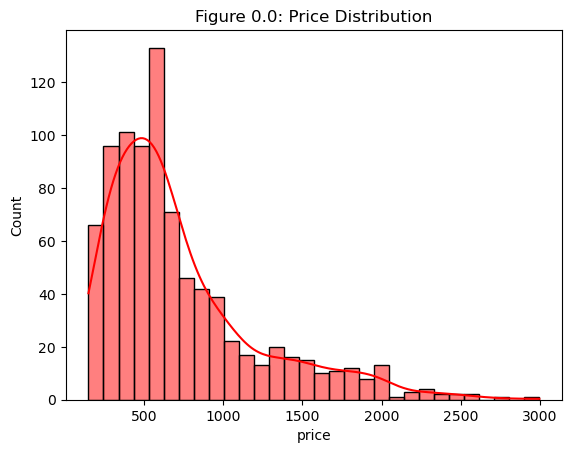

Figure 0.1: 
Average Price: 727.37
50th Percentile: 587.0
Least Expensive: 150.0
Most Expensive: 2995.0


In [6]:
#Getting the data decriptions
ds = data.price.describe()

#Making a histogram to show the price distribution
p = sns.histplot(data['price'], bins=30, kde='true', color='red')
p = p.set(title='Figure 0.0: Price Distribution')
plt.show()

print(f"Figure 0.1: ")
#The mean price
print(f"Average Price: {round(ds['mean'],2)}")
#The 50th Percentile
print(f"50th Percentile: {round(ds['50%'],2)}")
#The Least Expensive GPU
print(f"Least Expensive: {round(ds['min'],2)}")
#The Most Expensive GPU
print(f"Most Expensive: {round(ds['max'],2)}")

### **Correlations between different aspects of the Graphic Cards**

##### Figure 1. Price vs Performance Score

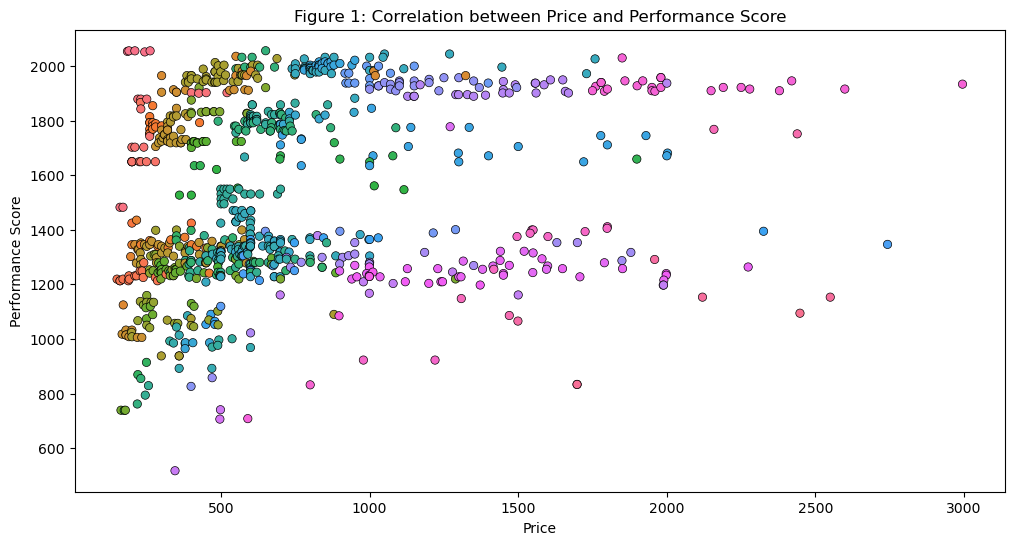

In [7]:
#Modify figure size for readability
plt.figure(figsize=(12, 6))

#Create the scatterplot
p = sns.scatterplot( x='price', y='performance_score', data=data, hue='chipset', legend=False, edgecolor='black')

#Adding labels and title
p = p.set(title='Figure 1: Correlation between Price and Performance Score', xlabel='Price', ylabel='Performance Score')

#Show the plot
plt.show()

As shown above, the the performance score does not have high correlation with the price. This proves that there are definetly good and bad decisions to be made when buying a new GPU.

#### Figure 2. Price vs Budget Score

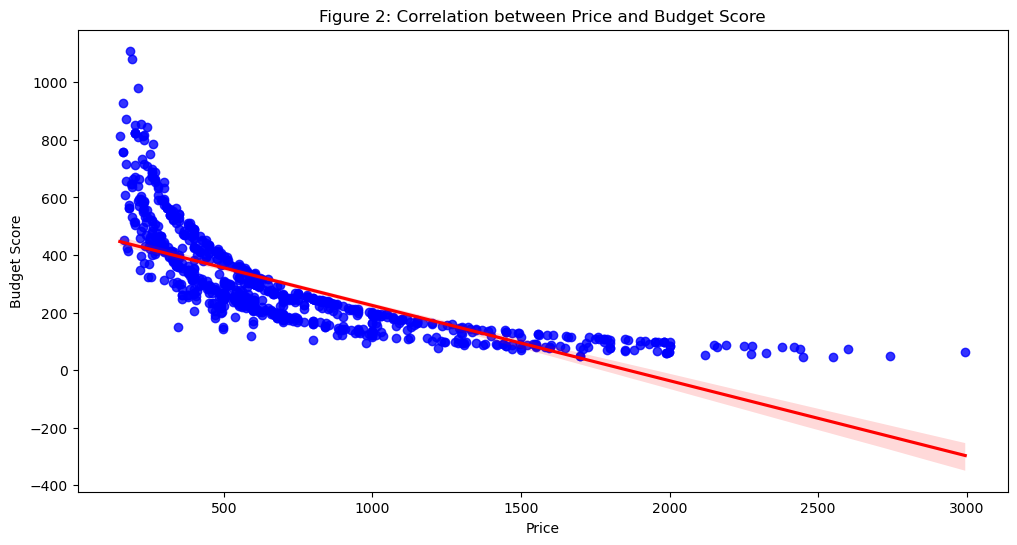

In [10]:
# #Group the data for the means of the budget score at each price to make the graph smoother
# grouped = data.groupby('price')[['budget_score']].mean()

#Modify figure size for readability
plt.figure(figsize=(12, 6))

#Create the lineplot
p = sns.regplot(x='price', y='budget_score', data=data, color='blue', line_kws={'color': 'red'})

#Add labels and title
p.set(title='Figure 2: Correlation between Price and Budget Score', xlabel='Price', ylabel='Budget Score')

#Show the plot
plt.show()


As one could predict with our formula, if the price increases, the budget score decreases exponentianally which makes the price and budget score have a big correlation.

#### Figure 3. Best chipsets within the top 50

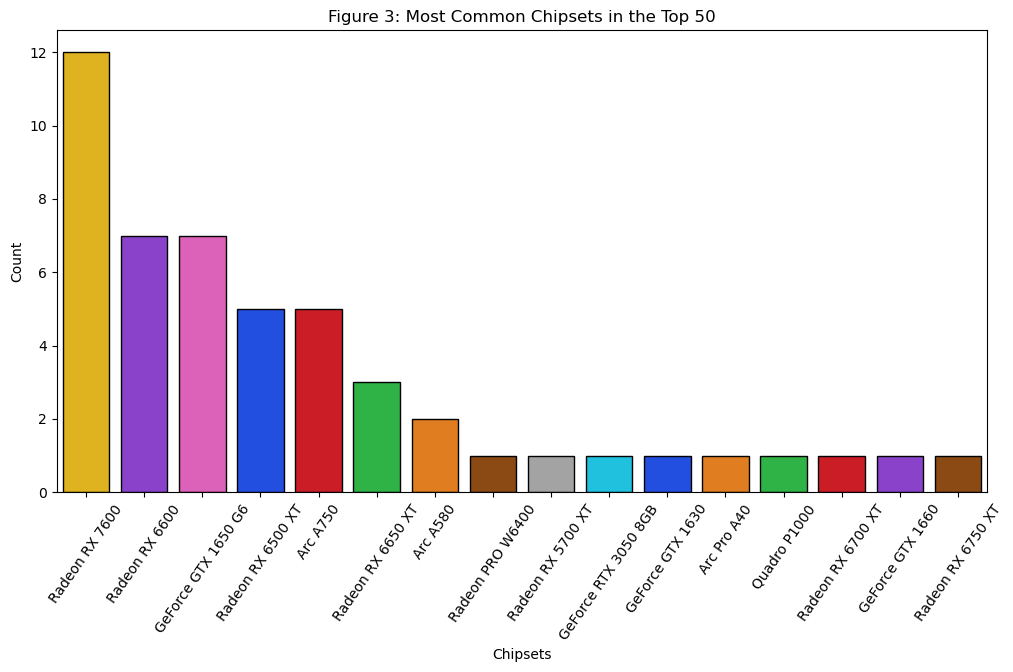

In [ ]:
#create the top 50
top_50 = data.head(50)

#Modify figure size for no overlapping labels
plt.figure(figsize=(12, 6))

#Create the countplot
p = sns.countplot( x='chipset', data=top_50, order=top_50['chipset'].value_counts().index, hue='chipset', palette='bright', edgecolor='black')

#Adding labels and title
p = p.set(title='Figure 3: Most Common Chipsets in the Top 50', xlabel='Chipsets', ylabel='Count')

#Rotate the x labels to remove text overlapping and show the plot
plt.xticks(rotation=55)
plt.show()

## **Discussions**

Looking at the results from the figures above, we can make several conclusions about the relationship between price, performance, and value within graphics cards of our dataset.

The general data results within **Figure 0.1** of the graphics cards reveals many trends. The average price is around $730, which is reasonable given that we excluded cards priced under $150. However, the 50th percentile is at $587, because the average is significantly higher than the median, it shows that while there are a few high-end cards with higher price tags pulling the average up by a significant margin. This figure displays that the market has a large volume of mid-range cards, with a lower ammount of high-end models pushing the average price upward. We can confirm this assumption by looking at the Price distribution within **Figure 0.0**, it indicates a right skew confirming all of our assumptions as there are a lot more mid-range cards than higher-end models.

**Figure 1** demonstates that price does not have a strong correlation with performance. There is a big overlap in the performance scores of cards priced at around $500. For instance, we can see that there is a simillar ammount of cards with a performance score of around 1300 and those closer to around 1900, even though their prices are about the same. This slim to none correlation between price and performance shows how much more value you can get with your money. The performance levels are most likely different because of the model's age and clocking speeds, as more recent models tend to have higher performance scores.

Within **Figure 2** we are looking at a strong negative correlation between the price and budget score. As the price increases, the budget score decreases. This is exactly what we should've expected because to get the best graphics card in a budget, the price must remain low in order to maintain a good budget score. In contrary, newer and more expensive models often come with worse returns in terms of performance per dollar, which is not ideal for budget-conscious buyers.

Finally, we arrive at a crucial results of **Figure 3**. The best budget graphics card is determined by its chipset because everything else varies by the manufacturer. In this figure, a count plot of the top 50 best budget graphics cards clearly shows the most frequent chipsets among the cards in this category. The best chipset is clearly the <ins>Radeon RX 7600</ins>, which appears more often than all others in the top rankings. This means that the Radeon RX 7600 offers the best balance between price, performance, and overall value in the budget segment.



## **Conclusion**

For anyone looking for the best value graphics card in the **150$–3000$ price range in November 2024**, the Radeon RX 7600 is the clear winner. Its combination of affordability and high performance makes it the top choice for budget-conscious gamers who want the most performance for their money. Whether you're building a new PC or upgrading an existing one, a card with the Radeon RX 7600 chipset offers the best value for gaming and performance. 

# **REFERENCES**

1. Source Data - https://github.com/docyx/pc-part-dataset/blob/main/data/csv/video-card.csv 
2. Pandas for data manipulation and visualization - https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
3. Seaborn for data visualization - https://seaborn.pydata.org/generated/seaborn.countplot.html
4. Matplotlib for data visualization - https://www.geeksforgeeks.org/data-visualization-using-matplotlib/

# **LLM PROMPTS**

- How could i make a good budget ratio to determine which graphic card is most worth it with this data:
name	price	chipset	memory	core_clock	boost_clock	 color	length (to make the Budget Fromula)

- Get rid of the spelling mistakes in my Discussions (to make is more readable and get rid of the small mistakes)